# ¡Hola Israel! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-danger">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Israel, has hecho un buen trabajo al explorar y visualizar los datos, mostrando un manejo adecuado de las herramientas básicas de análisis, lo cual es una base importante para el resto del proyecto. 

Sin embargo, es fundamental que ajustes la lógica del cálculo de consumo para llamadas e internet aplicando correctamente el redondeo hacia arriba, tal como se indica en el enunciado, ya que esto afecta directamente la estimación de ingresos por usuario. 

También es necesario que reformules las pruebas de hipótesis usando el método adecuado (`ttest_ind`) y que cierres tu análisis con una conclusión clara que responda a la pregunta del negocio. 

¡No te preocupes! Cada ajuste que haces es una oportunidad para aprender y mejorar. Vas por buen camino, y estoy seguro de que en la siguiente versión harás un gran trabajo y lograrás completar el proyecto con éxito. ¡Sigue adelante! 

Estaré atento a tu próxima iteración 👀



</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Israel excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Después de las observaciones no noté datos ausentes o nulos que deberían ser tratados. Los tipos de datos parecen ser los adecuados para cada una de las columnas.

## Corregir datos

## Enriquecer los datos

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Después de las observaciones pude notar que dentro de esta tabla hay dos columnas de fecha que están en un formato de string, mismas que se pueden convertir a un tipo de dato adecuado para poder trabajar con ellas más adelante si es que así se requiere. No noté datos ausentes o nulos que deberían ser tratados. Los tipos de datos parecen ser los adecuados para cada una de las columnas.

### Corregir los datos

In [7]:
formato_fecha = "%Y-%m-%d"
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format=formato_fecha)
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format=formato_fecha)

### Enriquecer los datos

Se agrego una columna adicional que guarda la información del mes.

In [8]:
df_users['month'] = df_users['reg_date'].dt.to_period("M")

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Después de las observaciones pude notar que dentro de esta tabla hay una columna de fecha que está en un formato de string, misma que se puede convertir a un tipo de dato adecuado para poder trabajar con ella más adelante si es que así se requiere. No noté datos ausentes o nulos que deberían ser tratados. Los tipos de datos parecen ser los adecuados para cada una de las demás columnas.

### Corregir los datos

In [11]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format=formato_fecha)

### Enriquecer los datos

Se agrego una columna adicional que guarda la información del mes.

In [12]:
df_calls['month'] = df_calls['call_date'].dt.to_period("M")

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Después de las observaciones pude notar que dentro de esta tabla hay una columna de fecha que está en un formato de string, misma que se puede convertir a un tipo de dato adecuado para poder trabajar con ella más adelante si es que así se requiere. No noté datos ausentes o nulos que deberían ser tratados. Los tipos de datos parecen ser los adecuados para cada una de las demás columnas.

### Corregir los datos

In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format=formato_fecha)

### Enriquecer los datos

Se agrego una columna adicional que guarda la información del mes.

In [16]:
df_messages['month'] = df_messages['message_date'].dt.to_period("M")

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Después de las observaciones pude notar que dentro de esta tabla hay una columna de fecha que está en un formato de string, misma que se puede convertir a un tipo de dato adecuado para poder trabajar con ella más adelante si es que así se requiere. No noté datos ausentes o nulos que deberían ser tratados. Los tipos de datos parecen ser los adecuados para cada una de las demás columnas.

### Corregir los datos

In [19]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format=formato_fecha)

### Enriquecer los datos

Se agrego una columna adicional que guarda la información del mes.

In [20]:
df_internet['month'] = df_internet['session_date'].dt.to_period("M")

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `head` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_merge_calls_users = df_calls.merge(df_users, on='user_id', how='left')
df_merge_calls_users = df_merge_calls_users.drop (['month_y'], axis = 1)
df_merge_calls_users = df_merge_calls_users.rename(columns = {'month_x': 'month'})
df_calls_by_user = df_merge_calls_users.groupby(by=['user_id', 'month'])['id'].count().reset_index()
print(df_calls_by_user.head(15))


    user_id    month   id
0      1000  2018-12   16
1      1001  2018-08   27
2      1001  2018-09   49
3      1001  2018-10   65
4      1001  2018-11   64
5      1001  2018-12   56
6      1002  2018-10   11
7      1002  2018-11   55
8      1002  2018-12   47
9      1003  2018-12  149
10     1004  2018-05   21
11     1004  2018-06   44
12     1004  2018-07   49
13     1004  2018-08   49
14     1004  2018-09   42


In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_mins_by_user = df_merge_calls_users.groupby(by=['user_id', 'month'])['duration'].sum().reset_index()
print(df_mins_by_user.head(15))


    user_id    month  duration
0      1000  2018-12    116.83
1      1001  2018-08    171.14
2      1001  2018-09    297.69
3      1001  2018-10    374.11
4      1001  2018-11    404.59
5      1001  2018-12    392.93
6      1002  2018-10     54.13
7      1002  2018-11    359.76
8      1002  2018-12    363.24
9      1003  2018-12   1041.00
10     1004  2018-05    181.58
11     1004  2018-06    261.32
12     1004  2018-07    358.45
13     1004  2018-08    334.86
14     1004  2018-09    284.60


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_merge_messages_users = df_messages.merge(df_users, on='user_id', how='left')
df_merge_messages_users = df_merge_messages_users.drop (['month_y'], axis = 1)
df_merge_messages_users = df_merge_messages_users.rename(columns = {'month_x': 'month'})
df_messages_by_user = df_merge_messages_users.groupby(by=['user_id', 'month'])['id'].count().reset_index()
print(df_messages_by_user.head(15))

    user_id    month  id
0      1000  2018-12  11
1      1001  2018-08  30
2      1001  2018-09  44
3      1001  2018-10  53
4      1001  2018-11  36
5      1001  2018-12  44
6      1002  2018-10  15
7      1002  2018-11  32
8      1002  2018-12  41
9      1003  2018-12  50
10     1004  2018-05   7
11     1004  2018-06  18
12     1004  2018-07  26
13     1004  2018-08  25
14     1004  2018-09  21


In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_merge_internet_users = df_internet.merge(df_users, on='user_id', how='left')
df_merge_internet_users = df_merge_internet_users.drop (['month_y'], axis = 1)
df_merge_internet_users = df_merge_internet_users.rename(columns = {'month_x': 'month'})
df_internet_by_user = df_merge_internet_users.groupby(by=['user_id', 'month'])['mb_used'].sum().reset_index()
print(df_internet_by_user.head(15))

    user_id    month   mb_used
0      1000  2018-12   1901.47
1      1001  2018-08   6919.15
2      1001  2018-09  13314.82
3      1001  2018-10  22330.49
4      1001  2018-11  18504.30
5      1001  2018-12  19369.18
6      1002  2018-10   6552.01
7      1002  2018-11  19345.08
8      1002  2018-12  14396.24
9      1003  2018-12  27044.14
10     1004  2018-05   6547.21
11     1004  2018-06  20672.82
12     1004  2018-07  24516.62
13     1004  2018-08  27981.74
14     1004  2018-09  18852.72


In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_plan_by_user = df_users.groupby(by=['user_id', 'month'])['plan'].first().reset_index()
df_merged_1 = df_calls_by_user.merge(df_mins_by_user, on=['user_id', 'month'], how='left')
df_merged_2 = df_merged_1.merge(df_messages_by_user, on=['user_id', 'month'], how='left')
df_merged_3 = df_merged_2.merge(df_internet_by_user, on=['user_id', 'month'], how='left')
df_merged_4 = df_merged_3.merge(df_plan_by_user, on=['user_id'], how='left')
df_merged_4['id_x'] = np.ceil(df_merged_4['id_x'])
df_merged_4['mb_used'] = np.ceil(df_merged_4['mb_used'] / 1000)
print(df_merged_4.head(15))

    user_id  month_x   id_x  duration  id_y  mb_used  month_y      plan
0      1000  2018-12   16.0    116.83  11.0      2.0  2018-12  ultimate
1      1001  2018-08   27.0    171.14  30.0      7.0  2018-08      surf
2      1001  2018-09   49.0    297.69  44.0     14.0  2018-08      surf
3      1001  2018-10   65.0    374.11  53.0     23.0  2018-08      surf
4      1001  2018-11   64.0    404.59  36.0     19.0  2018-08      surf
5      1001  2018-12   56.0    392.93  44.0     20.0  2018-08      surf
6      1002  2018-10   11.0     54.13  15.0      7.0  2018-10      surf
7      1002  2018-11   55.0    359.76  32.0     20.0  2018-10      surf
8      1002  2018-12   47.0    363.24  41.0     15.0  2018-10      surf
9      1003  2018-12  149.0   1041.00  50.0     28.0  2018-01      surf
10     1004  2018-05   21.0    181.58   7.0      7.0  2018-05      surf
11     1004  2018-06   44.0    261.32  18.0     21.0  2018-05      surf
12     1004  2018-07   49.0    358.45  26.0     25.0  2018-05   

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una correcta agrupación de los datos combinando `groupby`  y `merge`, pero recuerda que, según el enunciado del proyecto, los valores de duración de llamadas y consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por minuto y GB completo. Para esto debes tener en cuenta lo siguiente:

* **Llamadas:** Primero realiza el redondeo hacia arriba de los minutos para cada llamada y luego sumas los minutos totales por usuario para cada mes.

* **Internet:** Primero sumas el consumo total en MB para cada usuario por mes, luego conviertes ese valor a GB y finalmente realizas el redondeo hacia arriba.

Los valores finales que obtienes para cada usuario, los comparas con los minutos y GB incluidos en cada plan, con el fin de establecer si hubo un exceso en el consumo y hacer el cobro respectivo.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo agrupando los datos de consumo

</div>

In [27]:
# Añade la información de la tarifa
df_merged_final = df_merged_4.merge(df_plans, left_on='plan', right_on='plan_name', how='left')
df_merged_final = df_merged_final.drop (['plan_name', 'month_y'], axis = 1)
columns_new = {
    'user_id': 'user_id',
    'month_x': 'month',
    'id_x': 'n_calls',
    'duration': 'duration',
    'id_y': 'n_messages',
    'mb_used': 'mb_used',
    'plan': 'plan',
    'messages_included': 'messages_included',
    'mb_per_month_included': 'mb_per_month_included',
    'minutes_included': 'minutes_included',
    'usd_monthly_pay': 'usd_monthly_pay',
    'usd_per_gb': 'usd_per_gb',
    'usd_per_message': 'usd_per_message',
    'usd_per_minute': 'usd_per_minute'
}
df_merged_final = df_merged_final.rename(columns = columns_new)
df_merged_final['n_messages'].fillna(0, inplace=True)
df_merged_final.sample(5)

,user_id,month,n_calls,duration,n_messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
180,1045,2018-11,77.0,535.15,49.0,25.0,surf,50,15360,500,20,10,0.03,0.03
450,1098,2018-08,46.0,311.78,51.0,18.0,surf,50,15360,500,20,10,0.03,0.03
138,1039,2018-07,71.0,428.72,30.0,21.0,ultimate,1000,30720,3000,70,7,0.01,0.01
607,1132,2018-06,93.0,707.99,143.0,27.0,ultimate,1000,30720,3000,70,7,0.01,0.01
1846,1403,2018-08,33.0,235.70,0.0,23.0,ultimate,1000,30720,3000,70,7,0.01,0.01


In [28]:
# Calcula el ingreso mensual para cada usuario
def calculate_extra_calls(row):
    duration = row['duration']
    minutes_included = row['minutes_included']
    usd_per_minute = row['usd_per_minute']
    if duration > minutes_included:
        return (duration - minutes_included) * usd_per_minute
    else:
        return 0

def calculate_extra_messages(row):
    n_messages = row['n_messages']
    messages_included = row['messages_included']
    usd_per_message = row['usd_per_message']
    if n_messages > messages_included:
        return (n_messages - messages_included) * usd_per_message
    else:
        return 0
        
def calculate_extra_internet(row):
    mb_used = row['mb_used']
    mb_per_month_included = row['mb_per_month_included']
    usd_per_gb = row['usd_per_gb']
    if mb_used > mb_per_month_included:
        return (mb_used - mb_per_month_included) * usd_per_gb
    else:
        return 0

df_merged_final['extra_calls'] = df_merged_final.apply(calculate_extra_calls, axis=1)
df_merged_final['extra_messages'] = df_merged_final.apply(calculate_extra_messages, axis=1)
df_merged_final['extra_internet'] = df_merged_final.apply(calculate_extra_internet, axis=1)
df_merged_final['extra_total'] = df_merged_final['extra_calls'] + df_merged_final['extra_messages'] + df_merged_final['extra_internet']

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La lógica de cálculo del cobro mensual es correcta en general, solo necesitas ajustar el redondeo como te mencioné antes. Asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, además es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo Israel, has calculado correctamente el cobro mensual para cada usuario

</div>

## Estudia el comportamiento de usuario

### Llamadas

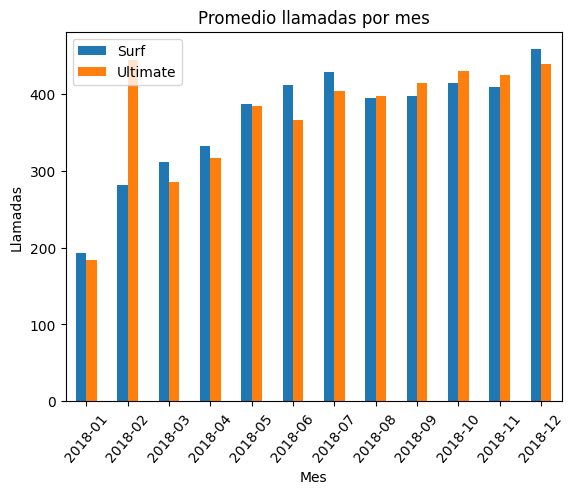

In [29]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_duration_mean = df_merged_final.groupby(by=['plan', 'month'])['duration'].mean().reset_index()
df_pivot = df_duration_mean.pivot(index='month', columns='plan', values='duration')
df_pivot.plot(kind='bar',
             title='Promedio llamadas por mes',
             xlabel='Mes',
             ylabel='Llamadas',
             rot=50)
plt.legend(['Surf', 'Ultimate'])
plt.show()

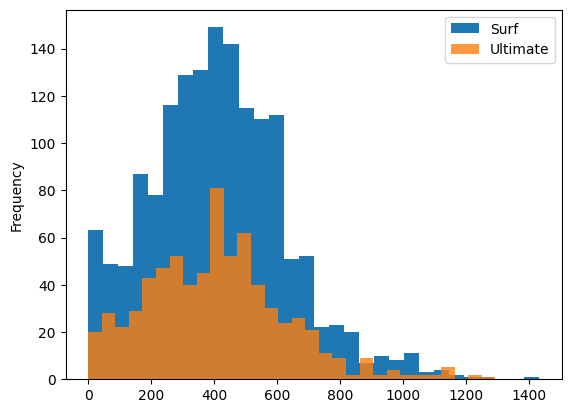

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_merged_final[df_merged_final['plan'] == 'surf']['duration'].plot(kind='hist', bins=30)
df_merged_final[df_merged_final['plan'] == 'ultimate']['duration'].plot(kind='hist', bins=30, alpha=0.8)
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.
surf_data = df_merged_final.query("plan == 'surf'")
surf_mean = surf_data['duration'].mean()
print('Surf mean: ', surf_mean)
ultimate_data = df_merged_final.query("plan == 'ultimate'")
ultimate_mean = ultimate_data['duration'].mean()
print('Ultimate mean: ', ultimate_mean)
print()
surf_variance = np.var(surf_data['duration'])
print('Surf variance: ', surf_variance)
ultimate_variance = np.var(ultimate_data['duration'])
print('Ultimate variance: ', ultimate_variance)

Surf mean:  412.0978899676375
Ultimate mean:  410.18095371669006

Surf variance:  46970.83270700407
Ultimate variance:  50439.789304279766


Diagrama de caja Surf


<AxesSubplot:xlabel='duration'>

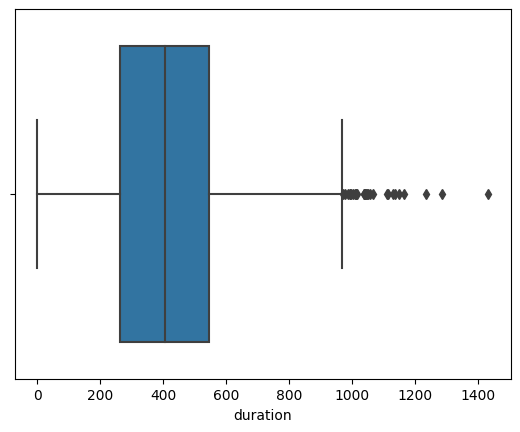

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
print('Diagrama de caja Surf')
sns.boxplot(surf_data['duration'])

Diagrama de caja Ultimate


<AxesSubplot:xlabel='duration'>

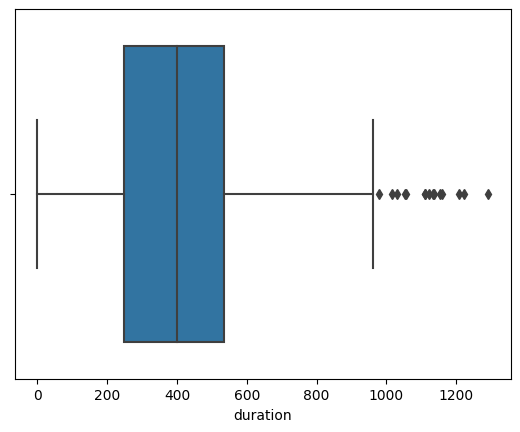

In [33]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
print('Diagrama de caja Ultimate')
sns.boxplot(ultimate_data['duration'])

Se puede observar que el plan Surf presenta valores atípicos más altos en comparación con el plan Ultimate.

### Mensajes

plan        surf  ultimate
month                     
2018-01     21.0      62.0
2018-02    108.0     139.0
2018-03    351.0     243.0
2018-04    870.0     463.0
2018-05   1829.0     931.0
2018-06   2427.0    1374.0
2018-07   3243.0    1937.0
2018-08   4588.0    2732.0
2018-09   5802.0    3259.0
2018-10   7718.0    4179.0
2018-11   8896.0    4861.0
2018-12  11884.0    6718.0


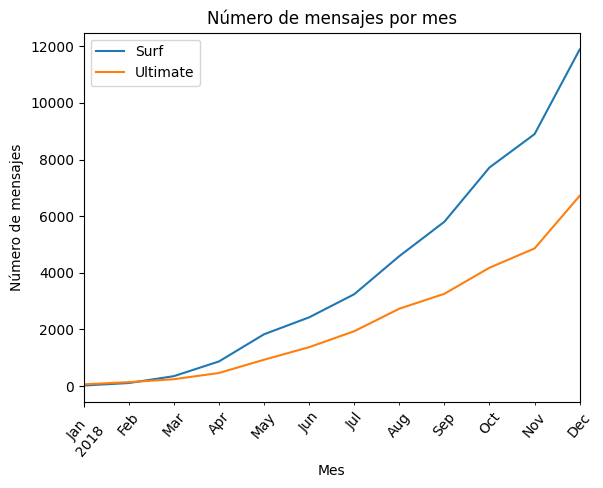

In [34]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_n_messages = df_merged_final.groupby(by=['plan', 'month'])['n_messages'].sum().reset_index()
df_pivot_messages = df_n_messages.pivot(index='month', columns='plan', values='n_messages')
print(df_pivot_messages)
df_pivot_messages.plot(kind='line',
             title='Número de mensajes por mes',
             xlabel='Mes',
             ylabel='Número de mensajes',
             rot=50)
plt.legend(['Surf', 'Ultimate'])
plt.show()

plan       surf  ultimate
month                    
2018-01    10.0      29.0
2018-02   114.0     110.0
2018-03   317.0     226.0
2018-04   621.0     346.0
2018-05  1104.0     495.0
2018-06  1514.0     739.0
2018-07  2076.0     992.0
2018-08  2755.0    1305.0
2018-09  3232.0    1508.0
2018-10  4105.0    1917.0
2018-11  4650.0    2206.0
2018-12  5741.0    2807.0


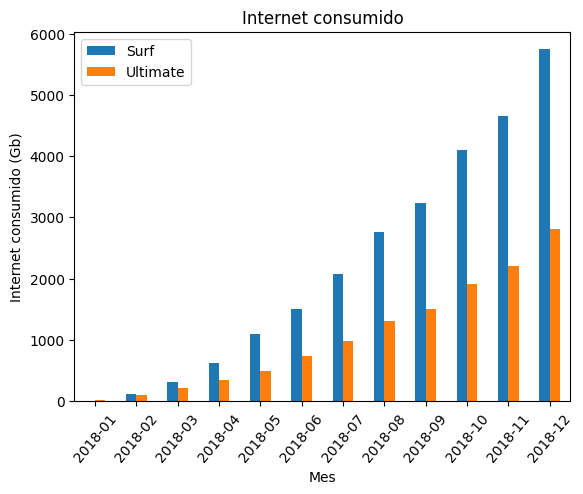

In [35]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
df_mb_used = df_merged_final.groupby(by=['plan', 'month'])['mb_used'].sum().reset_index()
df_pivot_mb_used = df_mb_used.pivot(index='month', columns='plan', values='mb_used')
print(df_pivot_mb_used)
df_pivot_mb_used.plot(kind='bar',
             title='Internet consumido',
             xlabel='Mes',
             ylabel='Internet consumido (Gb)',
             rot=50)
plt.legend(['Surf', 'Ultimate'])
plt.show()

Los gráficos parecen indicar que independientemente del plan, los usuarios aumentan su consumo mes a mes. Por otro lado, el plan Surf es el que tiene mayor demanda tanto en número de mensajes como en consumo de internet.

### Internet

Los gráficos parecen indicar que independientemente del plan, los usuarios aumentan su consumo mes a mes. Por otro lado, el plan Surf es el que tiene mayor demanda en consumo de internet.

## Ingreso

plan         surf  ultimate
month                      
2018-01    0.0000       0.0
2018-02    8.3106       0.0
2018-03   13.1760       0.0
2018-04   42.7350       0.0
2018-05  107.1069       0.0
2018-06  136.2813       0.0
2018-07  228.8550       0.0
2018-08  238.7550       0.0
2018-09  250.8168       0.0
2018-10  393.8802       0.0
2018-11  447.5142       0.0
2018-12  760.2246       0.0


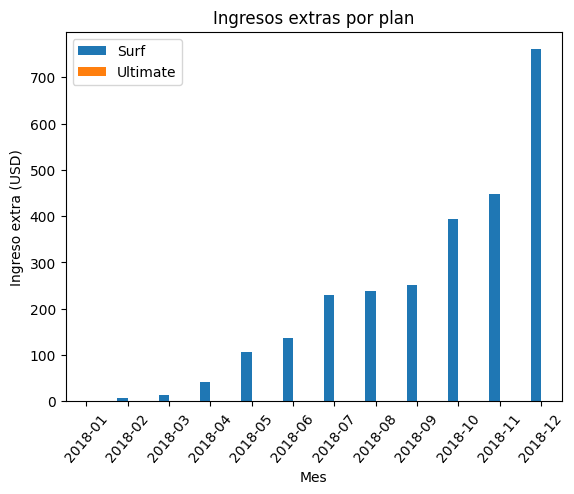

In [36]:
df_total_extra = df_merged_final.groupby(by=['plan', 'month'])['extra_total'].sum().reset_index()
df_pivot_total_extra = df_total_extra.pivot(index='month', columns='plan', values='extra_total')
print(df_pivot_total_extra)
df_pivot_total_extra.plot(kind='bar',
             title='Ingresos extras por plan',
             xlabel='Mes',
             ylabel='Ingreso extra (USD)',
             rot=50)
plt.legend(['Surf', 'Ultimate'])
plt.show()

La diferencia muy grande entre los ingresos mensuales extras que genera el plan Surf frente el plan Ultimate. De manera visual se puede ver muy clara esta segmentación inclinada en su totalidad hacia el plan Surf generando ganancias cada mes de manera exponencial.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente elección para las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos (minutos, mensajes e internet). Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Respecto a la información sobre **Ingresos**, seguramente las gráficas y datos que obtuviste cambiarán cuando hagas el ajuste en el cálculo de los cobros mensuales por usuario en cada plan, entonces vale la pena revisar si tu análisis deba ser ajustado también.

</div>
</div>

## Prueba las hipótesis estadísticas

[Decidí probar una hipótesis de una cola evaluando una muestra de 100 registros aleatorios del plan Ultimate, comparé con el promedio de ingreso extra del plan Surf y el resultado me dice que rechazamos la hipótesis nula que me indica que hay diferencia entre la muestra de un plan contra el promedio generado para el otro plan.]

*Resultado antes de correcciones*

<div class="alert alert-block alert-info">
<b>Mis comentarios</b> <a class=“tocSkip”></a>
    Gracias por los comentarios y estoy deacuerdo contigo, ciertamente el tipo de hipótesis que me sugieres es más adecuado para el próposito de este punto y el siguiente (en el que también haré la actualización), muchas gracias.
</div>

Comparando las medias de estas dos poblaciones (seccionando los datos por plan) se pudo aplicar la hipótesis sobre la igualdad de las medias de dos poblaciones y como resultado se puede ver que la relación de las gananacias de una población con otra presenta diferencia, misma que nos hace rechazar una hipótesis nula en la prueba.

*Resultado después de correcciones*

In [37]:
# Prueba las hipótesis
#total_extra_surf_mean = surf_data['extra_total'].mean()
#print(total_extra_surf_mean)
#total_extra_ultimate_mean = ultimate_data['extra_total'].mean()
#print(total_extra_ultimate_mean)

#total_extra_ultimate = ultimate_data['extra_total'].sample(100)
alpha = 0.05
results = st.ttest_ind(surf_data['extra_total'], ultimate_data['extra_total'])
print('valor p: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  9.879890288869533e-37
Rechazamos la hipótesis nula


El resultado señala que no podemos rechazar una hipótesis nula por lo que los ingresos promedio de estas regiones son similares a los de las demás regiones.

In [38]:
# Prueba las hipótesis
df_merged_city = df_merged_final.merge(df_users, on='user_id', how='left')
df_merged_city = df_merged_city.drop (['first_name', 'last_name', 'age', 'reg_date', 'plan_y', 'churn_date', 'month_y'], axis = 1)
cities = ['New York-Newark-Jersey City, NY-NJ-PA MSA', 'Buffalo-Cheektowaga, NY MSA', 'Albany-Schenectady-Troy, NY MSA', 'Rochester, NY MSA']
df_ny_nj = df_merged_city.query("city in @cities")
df_not_ny_nj = df_merged_city.query("city not in @cities")
ny_nj_mean = df_ny_nj['extra_total'].mean()

total_extra_not_ny_nj = df_not_ny_nj['extra_total'].sample(100)
alpha = 0.05
results = st.ttest_ind(df_ny_nj['extra_total'], df_not_ny_nj['extra_total'])
print('valor p: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.7744786459428786
No podemos rechazar la hipótesis nula


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

El método `st.ttest_1samp` es adecuado cuando no tenemos conjuntos de datos sino valores puntuales como la media; no obstante, en este caso si tienes los conjuntos de datos para ambas pruebas de hipótesis, por lo tanto es mas apropiado usar `st.ttest_ind` que compara dos distribuciones para hacer las pruebas de hipótesis

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo con los ajustes Israel

</div>

## Conclusión general

Fue un proyecto demandante en dónde se pudo aplicar muchos de los conceptos vistos en el sprint. Es muy importante tener limpios (gestión de nulos) y preparados (adición/creación de columnas) los datos para poder trabajar de la mejor manera cada uno de lo puntos enlistados en este notebook. La validación de hipótesis requieren que el proceso anterior se haya realizado bien para poder hacer la prueba y obtener resultados para sacar conclusiones.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Recuerda incluir una conclusión general de tu trabajo y dar respuesta a la pregunta inicial de este proyecto

```
"El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad"

```

</div>

El valor p obtenido en la hipótesis sobre igualdad de las medias de dos poblaciones nos dice que hay una clara diferencia entre los planes, siendo la tarifa de prepago "Surf" la que genera más ingresos para el negocio.